In [2]:
import numpy as np
import matplotlib.pyplot as plt
import kernels
%matplotlib inline

In [3]:
kern = kernels.RBF()

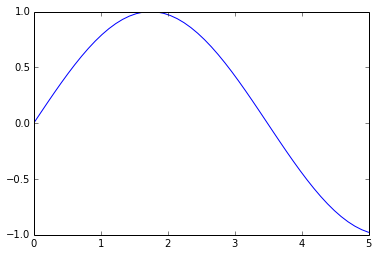

In [12]:
# Produce input and output
i = np.vstack(np.linspace(0, 5, 50))
    # Test 2D input data
#p = np.vstack(np.linspace(0, 10, 5))
#inputs = np.column_stack((i,p))
inputs = i
outputs = np.sin(0.9*inputs)

plt.figure()
plt.plot(i,outputs)
plt.show()

In [4]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
#ax.scatter(inputs[0], inputs[1], noisy_fn, zdir='noisy_fn')

In [5]:
Xnew = np.vstack(5*np.random.rand(3, 1))
Ynew = np.sin(0.9*Xnew)

In [51]:
# import kernels

class GP(object):

	def __init__(self, X, Y, Xn, Yn, kernel=None, normalize=True):
		self.X = X
		self.Y = Y
		self.Xn = Xn
		self.Yn = Yn
		self.kernel = kernel        
		#print self.X      
		if normalize is True: # works on 1D and 2D input
			mu = np.vstack(np.mean(X, axis=0))
			s = np.vstack(X.std(axis=0))
			centred = X.T - mu
			div = centred/s                       
			self.X = div.T
			#print mu
			#print s
			#print self.X      
		self.mean = mu
		self.sd = s
		if kernel is None: # Change Default_RBF to RBF once custom kernel constructed, delete Default_RBF class
			import warnings
			warnings.warn("Kernel not specified, defaulting to RBF kernel...")
			kernel = kernels.RBF()

		# Compute covariance matrix of test points
		self.cov = kernel.compute(self.X, self.X)          

	def plot_prior(self):
		# Manipulate X for plotting       
		X = np.hstack(self.X)
		
		# Set mean function, calculate covariance and standard deviation
		mean = np.zeros(X.shape)
		noisy_cov = self.cov + (0.00005 * np.eye(self.cov.shape[0]))       
		s = np.sqrt(np.diag(noisy_cov))
		     
		# Plot true function, mean function and uncertainty   
		plt.figure()
		plt.xlim(min(X), max(X))
		plt.ylim(min(mean-(2*s)-(s/2)), max(mean+(2*s)+(s/2)))       
		plt.plot(X, self.Y, 'b-', label='Y')
		plt.plot(X, mean, 'r--', lw=2, label='mean')
		plt.fill_between(X, mean-(2*s), mean+(2*s), color='#87cefa')
		plt.legend()
		plt.show() 
		
		# Plot draws from prior
		mean = mean.reshape(X.shape[0],1)
		f = mean + np.dot(noisy_cov, np.random.normal(size=(self.X.shape[0],10)))
		plt.figure()
		plt.xlim(min(X), max(X))
		plt.plot(X, f)
		plt.title('Ten samples')
		plt.show() 
        
	def plot_posterior(self, Xn, Yn, normalize=True): 
		X_predict = self.X
		
		# Normalize training points
		if normalize is True: # works on 1D and 2D input
			centred = Xn.T - self.mean
			div = centred/self.sd                       
			Xn = div.T
		
		# Covariance of training points with themselves
		Xn_cov = self.kernel.compute(Xn, Xn)
		# Covariance of test points with training points
		cross_cov = self.kernel.compute(X_predict, Xn)
		# Inverse of covariance of training points (with noise)
		inv = np.linalg.inv(Xn_cov + (0.00005*np.eye(Xn_cov.shape[0])))
		
		# Calculate mean function
		cross_x_inv = np.dot(cross_cov, inv)
		mean = np.dot(cross_x_inv,Yn)
		# Calculate covariance and standard deviation
		cov_post = self.cov - np.dot(np.dot(cross_cov,inv),cross_cov.T)
		s = np.sqrt(np.diag(cov_post))
		
		# Manipulate data for plotting
		mean_f = mean.flat
		X = np.hstack(X_predict)
		
		# Plot true function, predicted mean and uncertainty (2s), and training points
		plt.figure()
		plt.plot(Xn, Yn, 'r+', ms=20) # training points
		plt.xlim(min(X), max(X))
		plt.ylim(min(mean_f-(2*s)-(s/2)), max(mean_f+(2*s)+(s/2)))        
		plt.plot(X, self.Y, 'b-', label='Y') # true function
		plt.plot(X, mean_f, 'r--', lw=2, label='mean1') # mean function
		plt.fill_between(X, mean_f-(2*s), mean_f+(2*s), color='#87cefa') # uncertainty
		plt.legend()
		plt.show()
		
		# Plot 10 draws from posterior
		f = mean + np.dot(cov_post, np.random.normal(size=(X_predict.shape[0],10)))
		plt.figure()
		plt.xlim(min(X), max(X))
		plt.plot(X, f)
		plt.plot(Xn, Yn, 'r+', ms=20) # new points
		plt.title('Ten samples')
		plt.show()

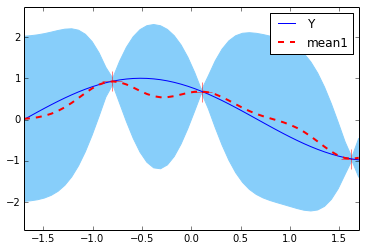

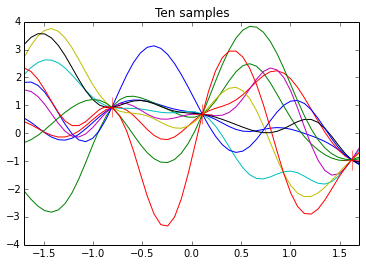

In [48]:
#kern = kernels.RBF(0.1)
test_case = GP(inputs, outputs, Xnew, Ynew, kernel=kern) # Optional: kernel, normalize
#test_case.prior(inputs)
#test_case.plot_prior(outputs)
test_case.plot_posterior(Xnew, Ynew)

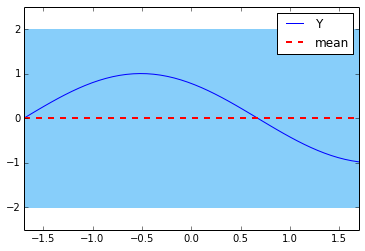

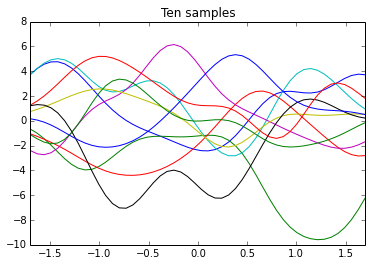

In [50]:
test_case = GP(inputs, outputs, Xnew, Ynew, kernel=kern) # Optional: kernel, normalize
#test_case.prior(inputs)
test_case.plot_prior()